Who knows how this will go? Certainly not me!<br>
Resources and references:<br>
https://www.youtube.com/watch?v=SmWbKiueYVU<br>
https://github.com/rohan-paul/LLM-FineTuning-Large-Language-Models/blob/main/Other-Language_Models_BERT_related/Topic_Modeling_with_BERT_and_Automatic_cluster_labeling/Topic_Modeling.ipynb

In [ ]:
# Ok so uh... how load data?
# Let's start with loading in libraries

import pandas as pd
from transformers import BertTokenizer
import random as rn
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
# Idk what else we need?
# I'll figure it out as I go at least

# We'll go ahead and grab what we need for the word clouds. 
# Just because they're cool
# from nltk.corpus import stopwords
from wordcloud import WordCloud

# This is for data cleaning
# We didn't need either of these
import re
# import xml

# We did actually need re

# Ok now data? Or do I just pull that directly into a dataframe?
# That is correct, we pull it into a dataframe.

Ok so we have our imports (for now) so now we'll go ahead and set up some basic data frames, then append the app name to the description. Well, ok first we'll figure out which part of the descriptions to keep. I think we just keep the detailed description out of the set.

In [16]:
df_steam_base = pd.read_csv('./Data/steam.csv')
df_steam_base

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27070,1065230,Room of Pandora,2019-04-24,1,SHEN JIAWEI,SHEN JIAWEI,windows,0,Single-player;Steam Achievements,Adventure;Casual;Indie,Adventure;Indie;Casual,7,3,0,0,0,0-20000,2.09
27071,1065570,Cyber Gun,2019-04-23,1,Semyon Maximov,BekkerDev Studio,windows,0,Single-player,Action;Adventure;Indie,Action;Indie;Adventure,0,8,1,0,0,0-20000,1.69
27072,1065650,Super Star Blast,2019-04-24,1,EntwicklerX,EntwicklerX,windows,0,Single-player;Multi-player;Co-op;Shared/Split ...,Action;Casual;Indie,Action;Indie;Casual,24,0,1,0,0,0-20000,3.99
27073,1066700,New Yankee 7: Deer Hunters,2019-04-17,1,Yustas Game Studio,Alawar Entertainment,windows;mac,0,Single-player;Steam Cloud,Adventure;Casual;Indie,Indie;Casual;Adventure,0,2,0,0,0,0-20000,5.19


In [17]:
df_steam_desc = pd.read_csv('./Data/steam_description_data.csv')
df_steam_desc

,steam_appid,detailed_description,about_the_game,short_description
0,10,Play the world's number 1 online action game. ...,Play the world's number 1 online action game. ...,Play the world's number 1 online action game. ...
1,20,One of the most popular online action games of...,One of the most popular online action games of...,One of the most popular online action games of...
2,30,Enlist in an intense brand of Axis vs. Allied ...,Enlist in an intense brand of Axis vs. Allied ...,Enlist in an intense brand of Axis vs. Allied ...
3,40,Enjoy fast-paced multiplayer gaming with Death...,Enjoy fast-paced multiplayer gaming with Death...,Enjoy fast-paced multiplayer gaming with Death...
4,50,Return to the Black Mesa Research Facility as ...,Return to the Black Mesa Research Facility as ...,Return to the Black Mesa Research Facility as ...
...,...,...,...,...
27329,1065230,"<img src=""https://steamcdn-a.akamaihd.net/stea...","<img src=""https://steamcdn-a.akamaihd.net/stea...",The Room of Pandora is a third-person interact...
27330,1065570,Have you ever been so lonely that no one but y...,Have you ever been so lonely that no one but y...,Cyber Gun is a hardcore first-person shooter w...
27331,1065650,<strong>Super Star Blast </strong>is a space b...,<strong>Super Star Blast </strong>is a space b...,Super Star Blast is a space based game with ch...
27332,1066700,Pursue a snow-white deer through an enchanted ...,Pursue a snow-white deer through an enchanted ...,Pursue a snow-white deer through an enchanted ...


In [18]:
merged_df = pd.merge(left=df_steam_desc, right=df_steam_base, left_on='steam_appid', right_on='appid')
merged_df.shape
merged_df.columns

Index(['steam_appid', 'detailed_description', 'about_the_game',
       'short_description', 'appid', 'name', 'release_date', 'english',
       'developer', 'publisher', 'platforms', 'required_age', 'categories',
       'genres', 'steamspy_tags', 'achievements', 'positive_ratings',
       'negative_ratings', 'average_playtime', 'median_playtime', 'owners',
       'price'],
      dtype='object')

In [24]:
working_data = merged_df[['steam_appid', 'name', 'detailed_description',
                          'developer', 'publisher', 'categories',
                          'genres', 'price']]
working_data
# working_data.shape

,steam_appid,name,detailed_description,developer,publisher,categories,genres,price
0,10,Counter-Strike,Play the world's number 1 online action game. ...,Valve,Valve,Multi-player;Online Multi-Player;Local Multi-P...,Action,7.19
1,20,Team Fortress Classic,One of the most popular online action games of...,Valve,Valve,Multi-player;Online Multi-Player;Local Multi-P...,Action,3.99
2,30,Day of Defeat,Enlist in an intense brand of Axis vs. Allied ...,Valve,Valve,Multi-player;Valve Anti-Cheat enabled,Action,3.99
3,40,Deathmatch Classic,Enjoy fast-paced multiplayer gaming with Death...,Valve,Valve,Multi-player;Online Multi-Player;Local Multi-P...,Action,3.99
4,50,Half-Life: Opposing Force,Return to the Black Mesa Research Facility as ...,Gearbox Software,Valve,Single-player;Multi-player;Valve Anti-Cheat en...,Action,3.99
...,...,...,...,...,...,...,...,...
27070,1065230,Room of Pandora,"<img src=""https://steamcdn-a.akamaihd.net/stea...",SHEN JIAWEI,SHEN JIAWEI,Single-player;Steam Achievements,Adventure;Casual;Indie,2.09
27071,1065570,Cyber Gun,Have you ever been so lonely that no one but y...,Semyon Maximov,BekkerDev Studio,Single-player,Action;Adventure;Indie,1.69
27072,1065650,Super Star Blast,<strong>Super Star Blast </strong>is a space b...,EntwicklerX,EntwicklerX,Single-player;Multi-player;Co-op;Shared/Split ...,Action;Casual;Indie,3.99
27073,1066700,New Yankee 7: Deer Hunters,Pursue a snow-white deer through an enchanted ...,Yustas Game Studio,Alawar Entertainment,Single-player;Steam Cloud,Adventure;Casual;Indie,5.19


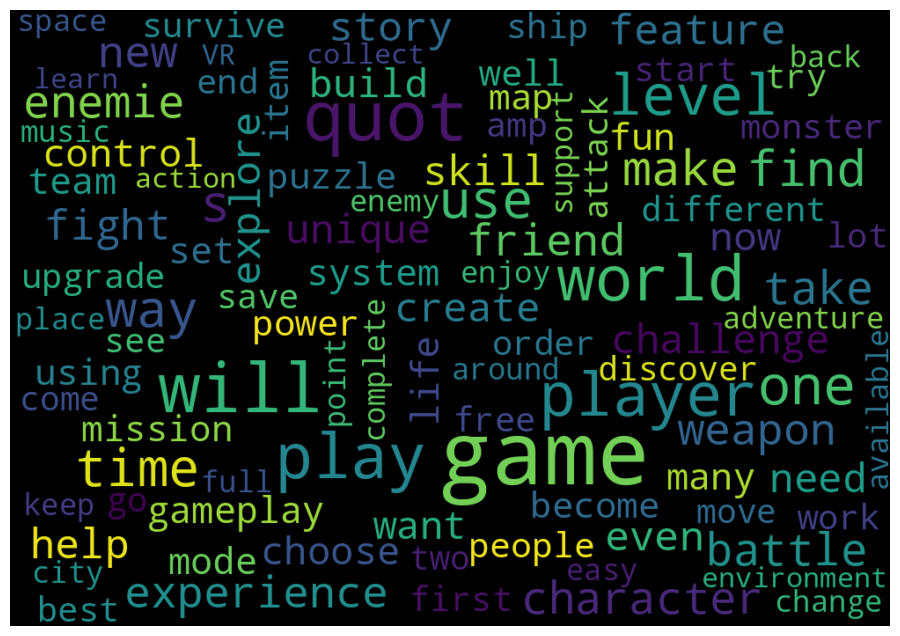

In [23]:
# Tbh I'm just going to make a general word cloud just because

txt = ' '.join(desc for desc in working_data.detailed_description)

plt.figure(figsize=(15, 8))

wordcloud = WordCloud(
    background_color='black',
    max_font_size=100,
    max_words=100,
    width=1000,
    height=700
).generate(txt)

plt.imshow(wordcloud, interpolation='bilinear')

plt.axis('off')

plt.show()

<b><font size="10">This is where the cleaning happnes</font></b>

In [25]:
# So we made the function now we need to run it through the text?
# Yeeeeaaaahhhhhh
# !!this is where we clean stuff

# df_clean = working_data.copy()
# df_clean['description'] = df_clean['detailed_description']
# df_clean['description'] = df_clean['description'].apply(remove_tags)

# df_clean['description']
# df_clean.to_csv('./Data/justtakingalook.csv')

def unify_whitespaces(text):
    cleaned_string = re.sub(' +', ' ', text)
    return cleaned_string

def other_cleaning(text):
    result = re.sub(r"\s+",' ', text)
    result = re.sub(r'\d+', '', result)
    return result.strip()

# Let's try something else
# https://stackoverflow.com/questions/45999415/removing-html-tags-in-pandas
working_data['detailed_description'] = working_data['detailed_description'].str.replace(r'<[^<>]*>', '', regex=True)
# working_data['detailed_description']

working_data['detailed_description'] = working_data['detailed_description'].apply(unify_whitespaces)
working_data['detailed_description']

working_data['detailed_description'] = working_data['detailed_description'].apply(other_cleaning)
working_data['detailed_description'] = working_data['detailed_description'].str.lower()


working_data['detailed_description'].to_csv('./Data/justtakingalook.csv')


/tmp/ipykernel_3694/3561480373.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  working_data['detailed_description'] = working_data['detailed_description'].str.replace(r'<[^<>]*>', '', regex=True)
/tmp/ipykernel_3694/3561480373.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  working_data['detailed_description'] = working_data['detailed_description'].apply(unify_whitespaces)
/tmp/ipykernel_3694/3561480373.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

<b><font size="10">One-hot encoding genres</font></b>

In [21]:
working_data['genres']

# DeepSeek gave me permission to explode things
# https://chat.deepseek.com/a/chat/s/dbfcda76-a165-49ad-a23f-fc2edb9f1da9

working_data['genres'] = working_data['genres'].str.split(';')
df_working_data_generes_exploded = working_data.explode('genres')

df_working_data_generes_exploded

/tmp/ipykernel_3694/3497513410.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  working_data['genres'] = working_data['genres'].str.split(';')


,steam_appid,name,detailed_description,developer,publisher,categories,genres,price
0,10,Counter-Strike,Play the world's number online action game. E...,Valve,Valve,Multi-player;Online Multi-Player;Local Multi-P...,Action,7.19
1,20,Team Fortress Classic,One of the most popular online action games of...,Valve,Valve,Multi-player;Online Multi-Player;Local Multi-P...,Action,3.99
2,30,Day of Defeat,Enlist in an intense brand of Axis vs. Allied ...,Valve,Valve,Multi-player;Valve Anti-Cheat enabled,Action,3.99
3,40,Deathmatch Classic,Enjoy fast-paced multiplayer gaming with Death...,Valve,Valve,Multi-player;Online Multi-Player;Local Multi-P...,Action,3.99
4,50,Half-Life: Opposing Force,Return to the Black Mesa Research Facility as ...,Gearbox Software,Valve,Single-player;Multi-player;Valve Anti-Cheat en...,Action,3.99
...,...,...,...,...,...,...,...,...
27073,1066700,New Yankee 7: Deer Hunters,Pursue a snow-white deer through an enchanted ...,Yustas Game Studio,Alawar Entertainment,Single-player;Steam Cloud,Casual,5.19
27073,1066700,New Yankee 7: Deer Hunters,Pursue a snow-white deer through an enchanted ...,Yustas Game Studio,Alawar Entertainment,Single-player;Steam Cloud,Indie,5.19
27074,1069460,Rune Lord,A portal has opened and dark magic is pouring ...,Adept Studios GD,Alawar Entertainment,Single-player;Steam Cloud,Adventure,5.19
27074,1069460,Rune Lord,A portal has opened and dark magic is pouring ...,Adept Studios GD,Alawar Entertainment,Single-player;Steam Cloud,Casual,5.19


Proof of DeepSeek letting me explode things

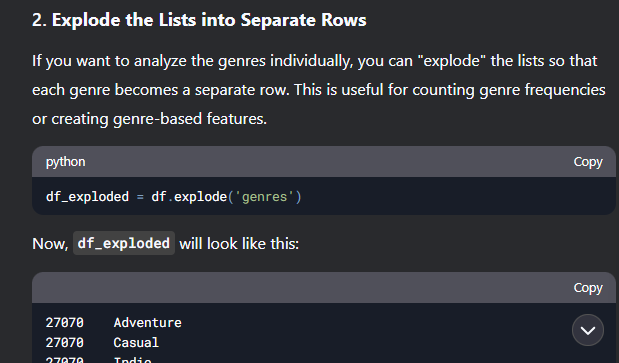

In [22]:
# I'll admit DeepSeek gave me more than I was intending on using,
# But it'd be a waste of resources not to use it.

df_genres_one_hot = working_data['genres'].str.join(
    '|').str.get_dummies()

df_genres_one_hot

,Accounting,Action,Adventure,Animation & Modeling,Audio Production,Casual,Design & Illustration,Documentary,Early Access,Education,...,Sexual Content,Simulation,Software Training,Sports,Strategy,Tutorial,Utilities,Video Production,Violent,Web Publishing
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27070,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27071,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27072,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27073,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<b><font size="10">tokenizing</font></b><br>
Ok so<br>
It looks like this is where the tutorial stops being useful<br>
Because I don't see it using BERT anywhere<br>

So this is where this query from DeepSeek started being used<br>
I didn't actually ask for this info specifically.<br>
(insert or imagine screenshots here)


In [ ]:
from transformers import BertTokenizer, BertModel
import torch

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained ('bert-base-uncased')

# I have found out the words that I'm looking for is Similarity Analysis
